In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha','fDist', 'class']
df = pd.read_csv('data/magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df['class'] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


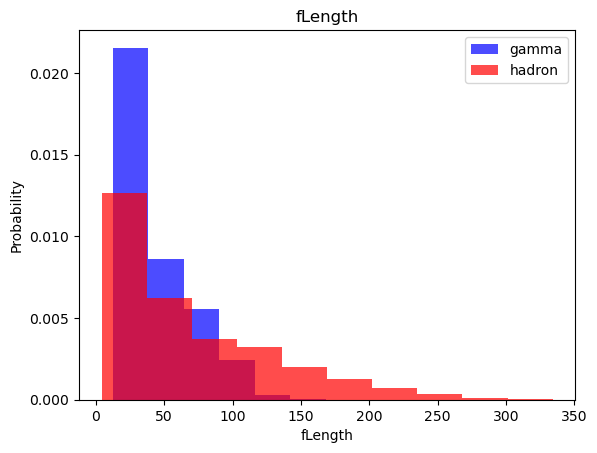

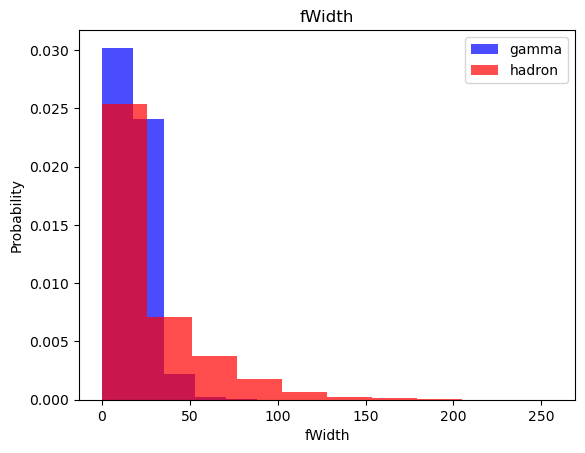

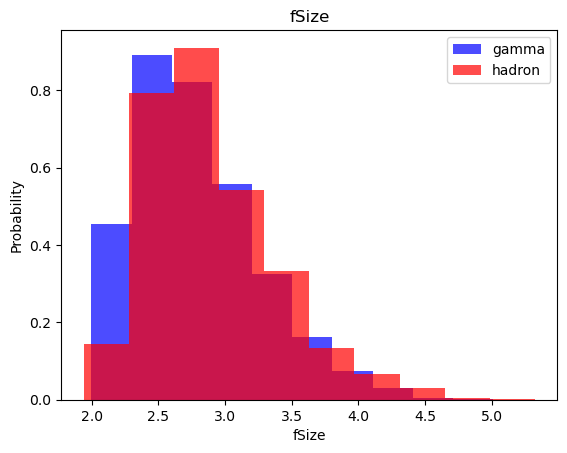

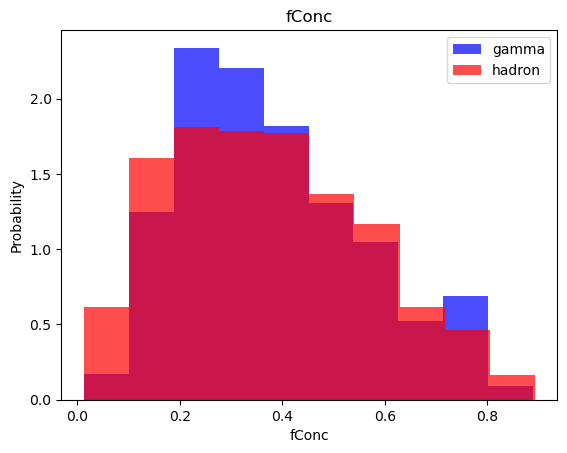

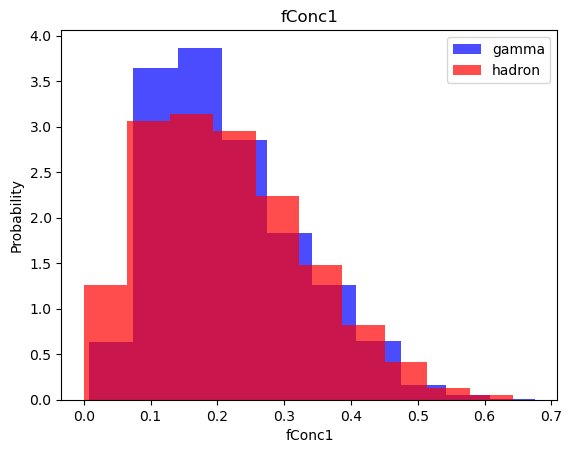

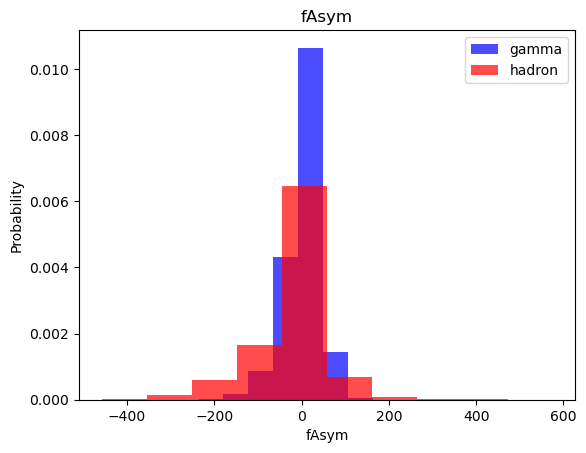

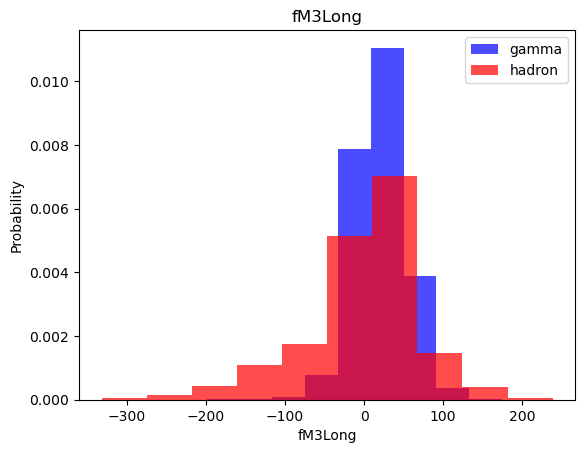

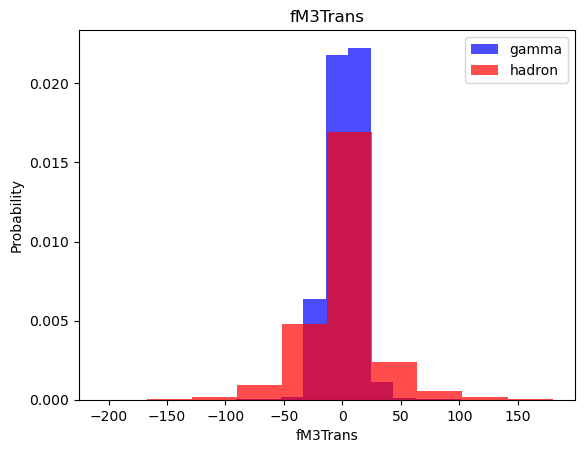

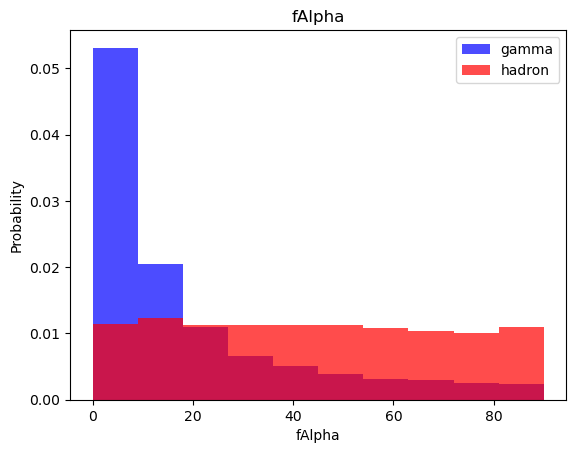

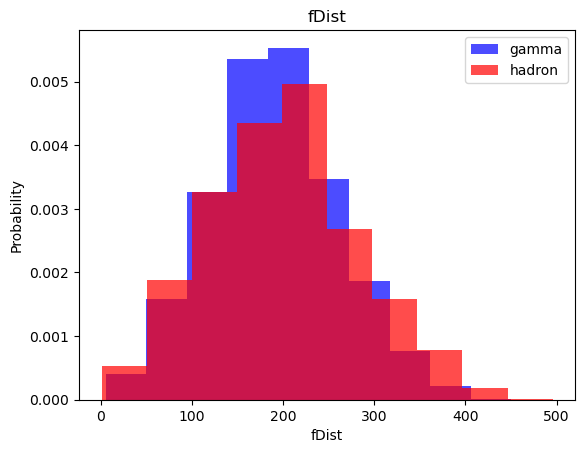

In [4]:
for label in cols[:-1]:
	plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
	plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
	plt.title(label)
	plt.ylabel('Probability')
	plt.xlabel(label)
	plt.legend()
	plt.show()

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8 * len(df))])
print(len(train))
print(len(valid))
print(len(test))

11412
3804
3804


/home/happypotter/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
  
    data = np.hstack((x,np.reshape(y, (-1, 1))))

    return data, x, y

In [7]:
train, x_train, y_train = scale_dataset(dataframe=train, oversample=True)
valid, x_valid, y_valid = scale_dataset(dataframe=valid, oversample=False)
test, x_test, y_test = scale_dataset(dataframe=test, oversample=False)

### k-nearest Neighbour
result calculates based on nearest neighbours


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn_model.predict(x_test)


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1346
           1       0.85      0.86      0.86      2458

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.82      0.81      3804



### Naive Bayes Model
result calculated based on Bayes's theorem

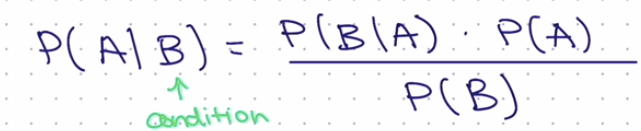 

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [14]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1346
           1       0.73      0.90      0.81      2458

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [17]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1346
           1       0.84      0.82      0.83      2458

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### Support Vector Machines

In [18]:
from sklearn.svm import SVC

In [19]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [20]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1346
           1       0.88      0.90      0.89      2458

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Networks

In [21]:
import tensorflow as tf

2024-12-21 10:52:52.962425: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 10:52:52.981239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
def plot_history(history):
	fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10, 4))
	ax1.plot(history.history['loss'], label='loss')
	ax1.plot(history.history['val_loss'], label='val_loss')
	ax1.set_xlabel('Epoch')
	ax1.set_ylabel('Binary crossentropy')
	ax1.legend()
	ax1.grid(True)

	ax2.plot(history.history['accuracy'], label='accuracy')
	ax2.plot(history.history['val_accuracy'], label='val_accuracy')
	ax2.set_xlabel('Epoch')
	ax2.set_ylabel('Accuracy')
	ax2.grid(True)

	plt.show()

In [23]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, x_valid, y_valid):

	nm_model = tf.keras.Sequential([
		tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(num_nodes, activation='relu'),
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(1, activation='sigmoid')
	])
	nm_model.compile(optimizer=tf.keras.optimizers.Adamax(lr), loss='binary_crossentropy', metrics=['accuracy'])

	history = nm_model.fit(
		x_train, y_train, 
		epochs=epochs, batch_size=batch_size, validation_data=(x_train, y_train) , verbose=0
	)

	return nm_model, history


16 nodes, dropout 0, lr 0.01, batch_size 32


/home/happypotter/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


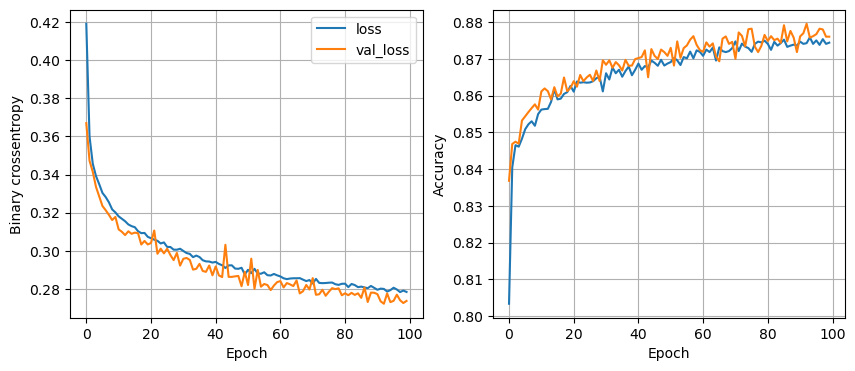

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8588 - loss: 0.3469
16 nodes, dropout 0, lr 0.01, batch_size 64


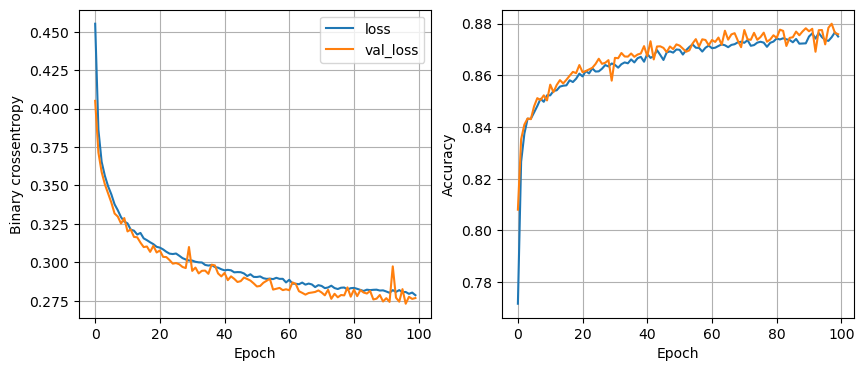

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8342 - loss: 0.3679
16 nodes, dropout 0, lr 0.01, batch_size 128


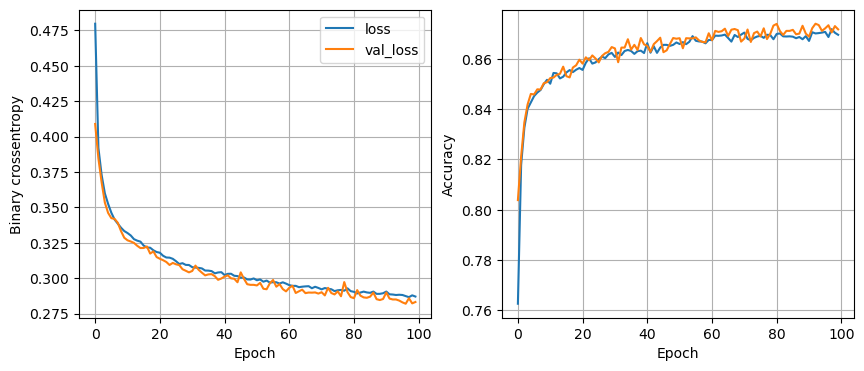

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8472 - loss: 0.3531
16 nodes, dropout 0, lr 0.005, batch_size 32


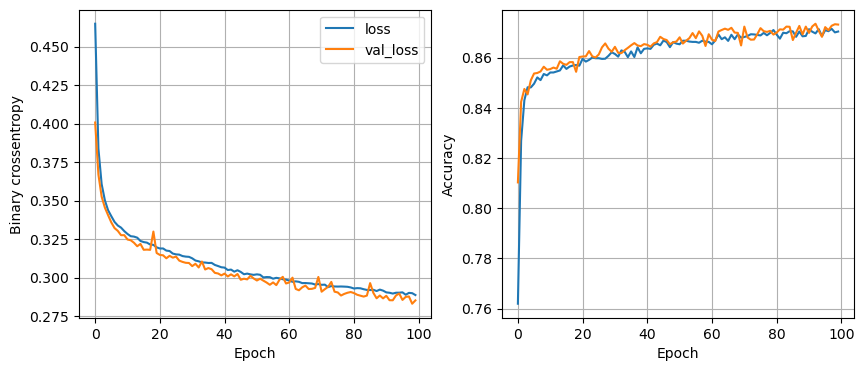

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8502 - loss: 0.3536
16 nodes, dropout 0, lr 0.005, batch_size 64


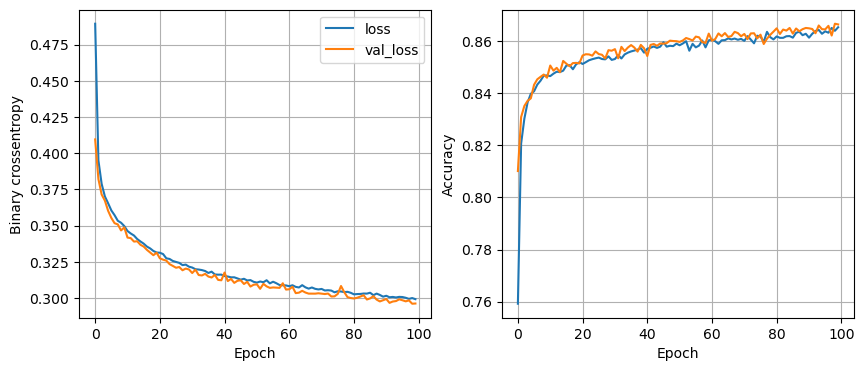

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8526 - loss: 0.3528
16 nodes, dropout 0, lr 0.005, batch_size 128


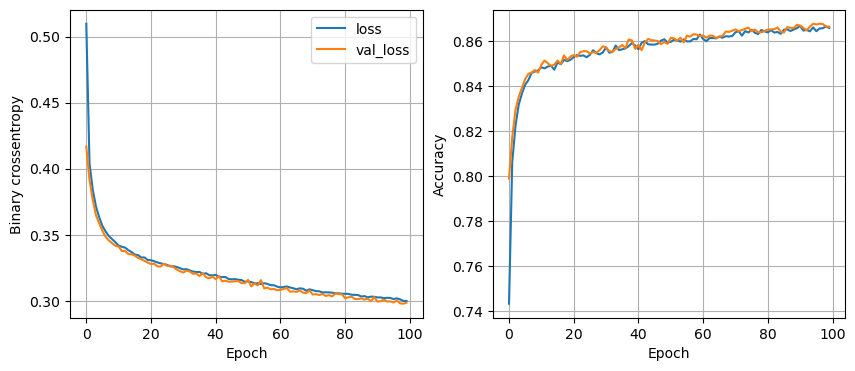

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8482 - loss: 0.3515
16 nodes, dropout 0, lr 0.001, batch_size 32


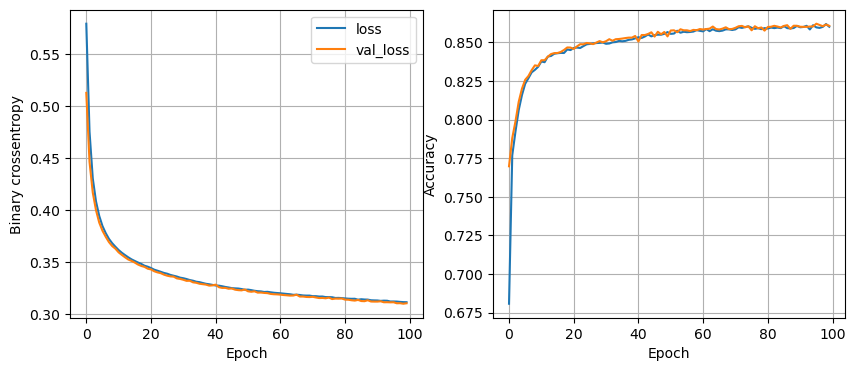

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8536 - loss: 0.3510
16 nodes, dropout 0, lr 0.001, batch_size 64


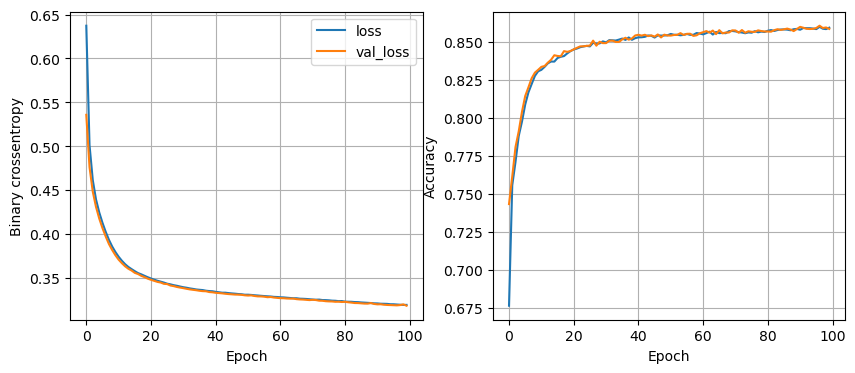

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8456 - loss: 0.3579
16 nodes, dropout 0, lr 0.001, batch_size 128


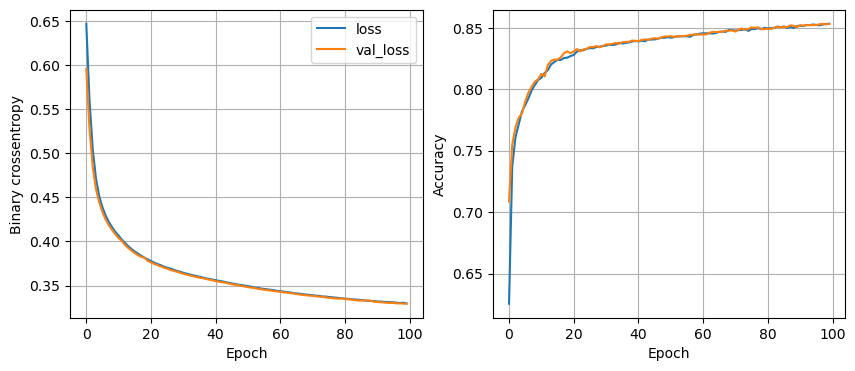

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8414 - loss: 0.3590
16 nodes, dropout 0.2, lr 0.01, batch_size 32


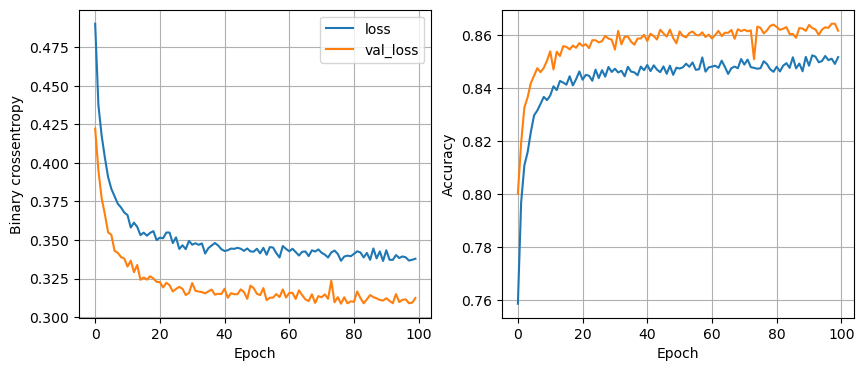

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8567 - loss: 0.3449
16 nodes, dropout 0.2, lr 0.01, batch_size 64


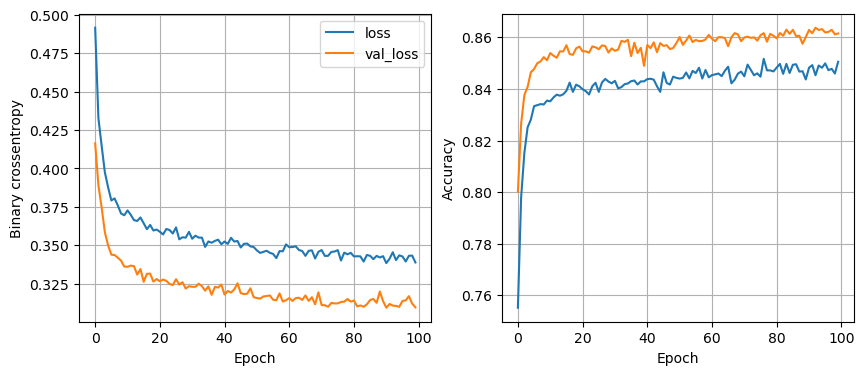

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8461 - loss: 0.3624
16 nodes, dropout 0.2, lr 0.01, batch_size 128


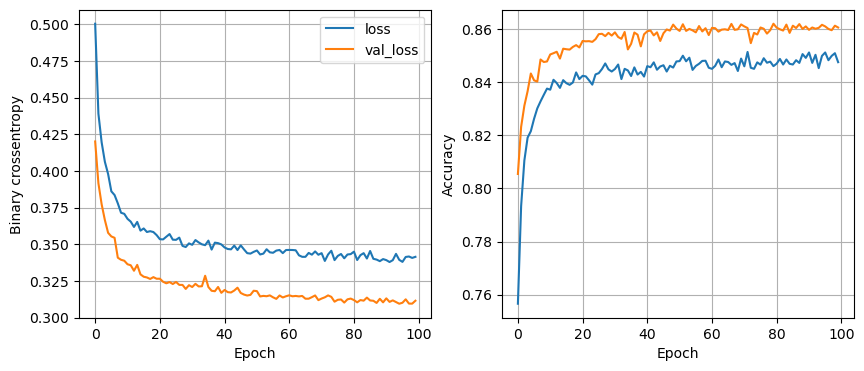

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8454 - loss: 0.3725
16 nodes, dropout 0.2, lr 0.005, batch_size 32


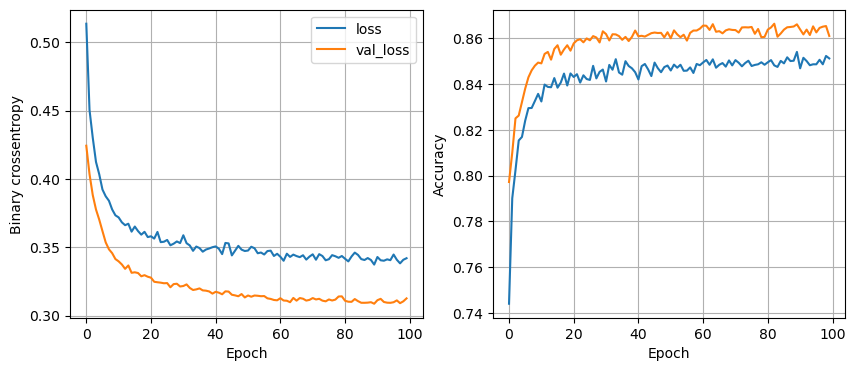

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8551 - loss: 0.3435
16 nodes, dropout 0.2, lr 0.005, batch_size 64


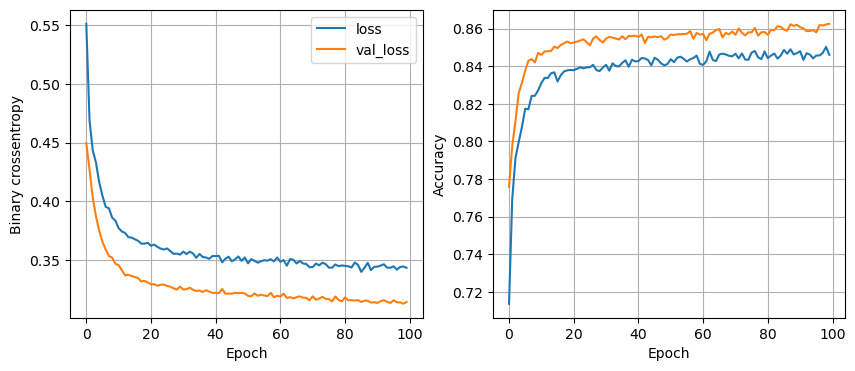

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8462 - loss: 0.3529
16 nodes, dropout 0.2, lr 0.005, batch_size 128


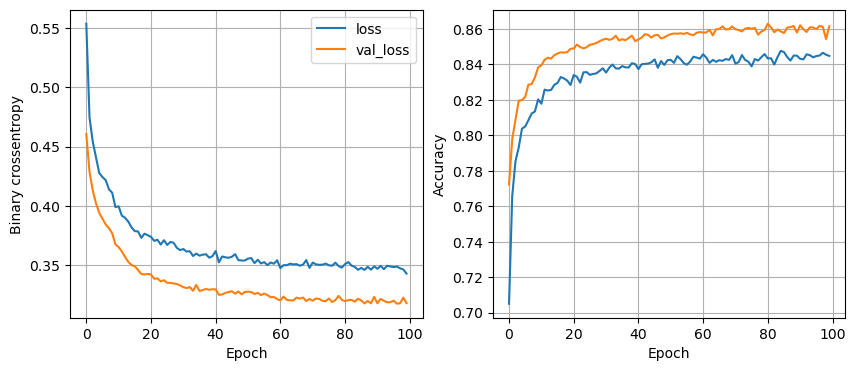

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8580 - loss: 0.3463
16 nodes, dropout 0.2, lr 0.001, batch_size 32


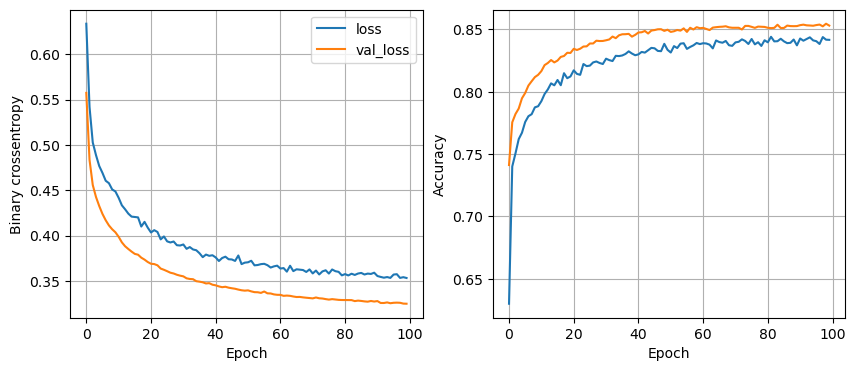

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.8410 - loss: 0.3566
16 nodes, dropout 0.2, lr 0.001, batch_size 64


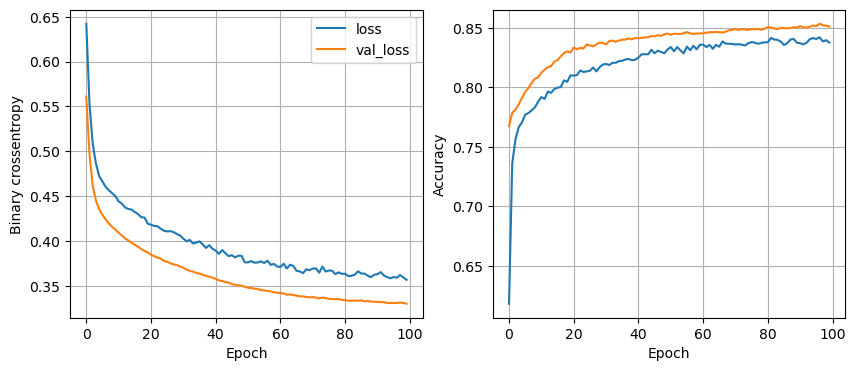

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.8495 - loss: 0.3604
16 nodes, dropout 0.2, lr 0.001, batch_size 128


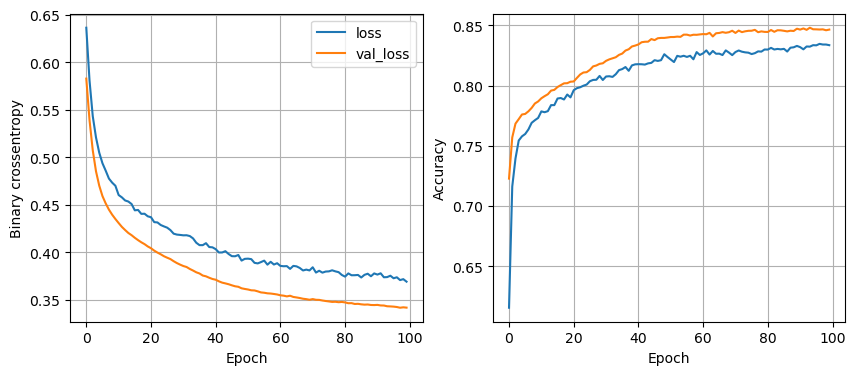

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8462 - loss: 0.3660
32 nodes, dropout 0, lr 0.01, batch_size 32


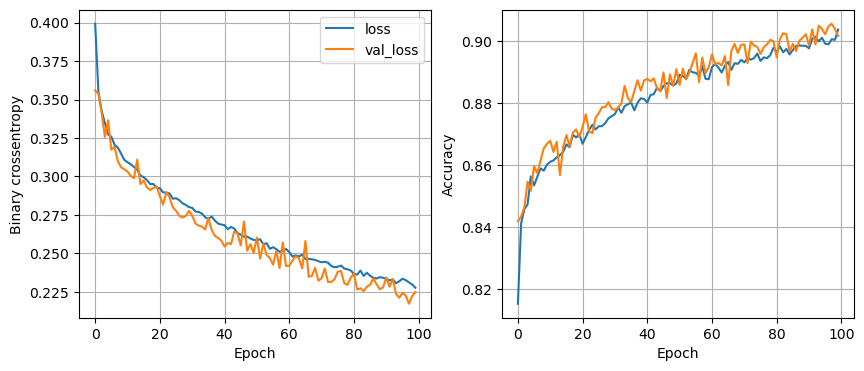

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8592 - loss: 0.3824
32 nodes, dropout 0, lr 0.01, batch_size 64


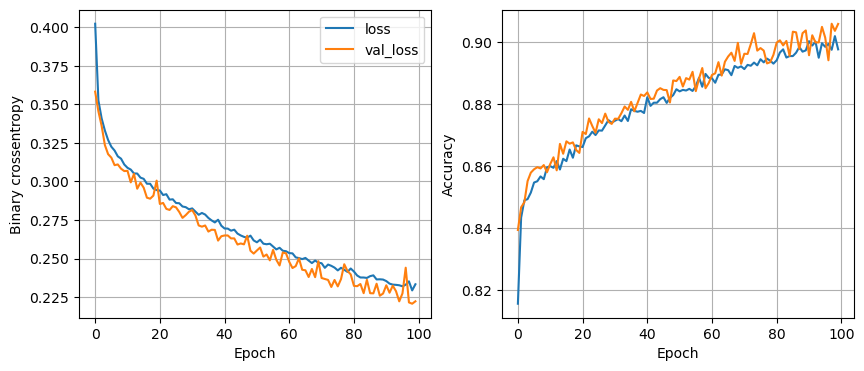

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8529 - loss: 0.3783
32 nodes, dropout 0, lr 0.01, batch_size 128


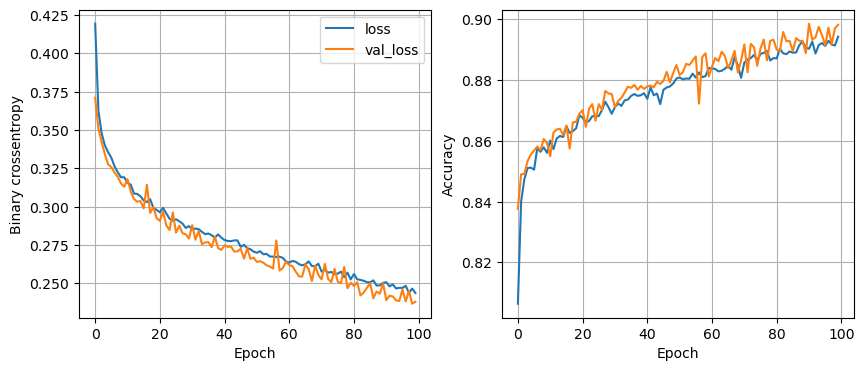

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8461 - loss: 0.3911
32 nodes, dropout 0, lr 0.005, batch_size 32


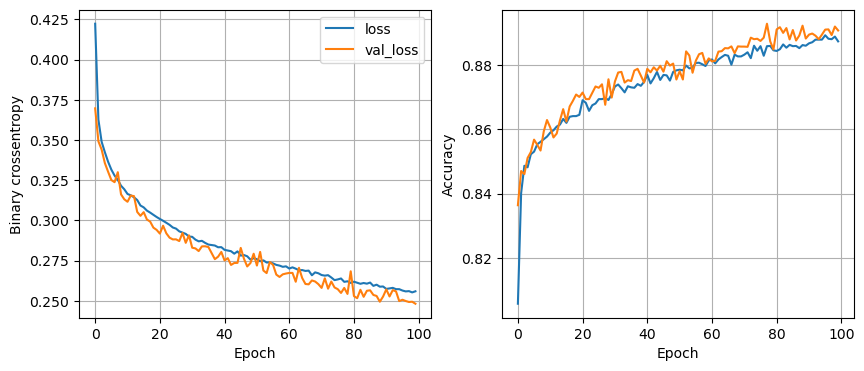

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8586 - loss: 0.3504
32 nodes, dropout 0, lr 0.005, batch_size 64


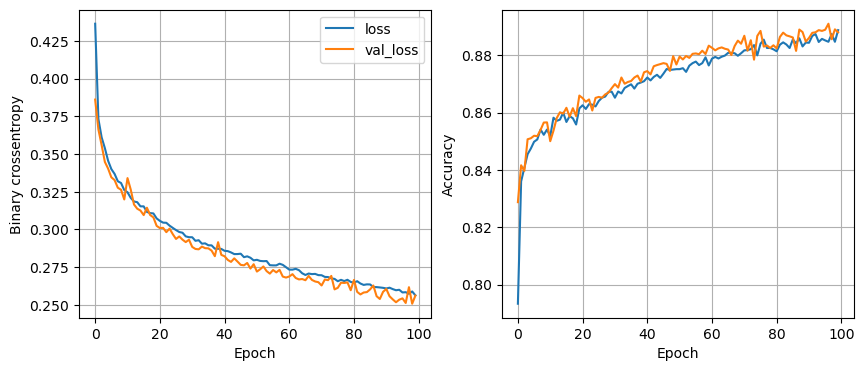

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8305 - loss: 0.3904
32 nodes, dropout 0, lr 0.005, batch_size 128


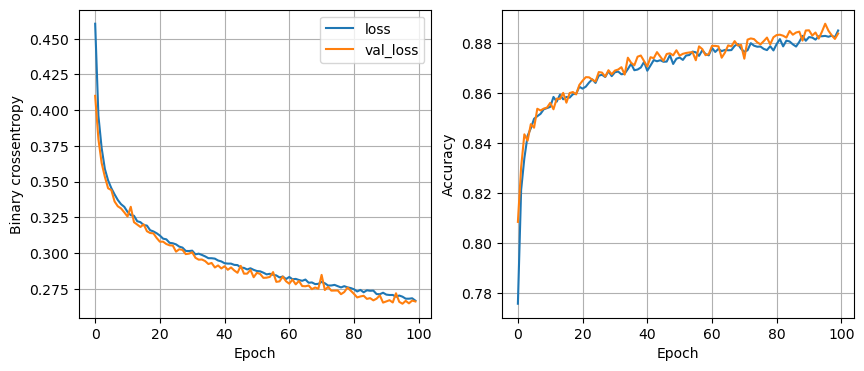

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8427 - loss: 0.3770
32 nodes, dropout 0, lr 0.001, batch_size 32


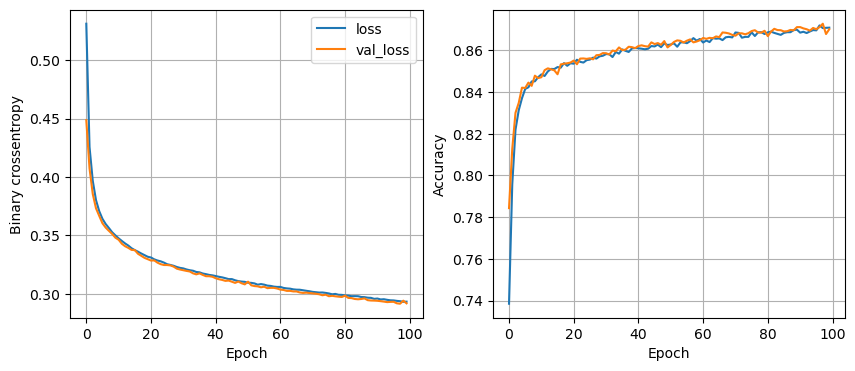

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8556 - loss: 0.3427
32 nodes, dropout 0, lr 0.001, batch_size 64


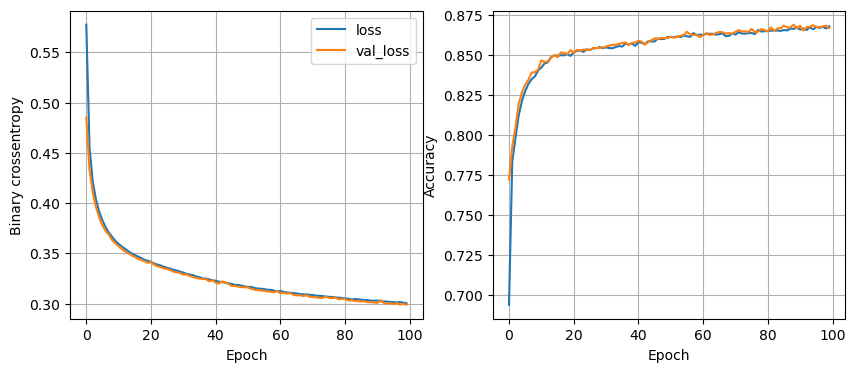

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8543 - loss: 0.3519
32 nodes, dropout 0, lr 0.001, batch_size 128


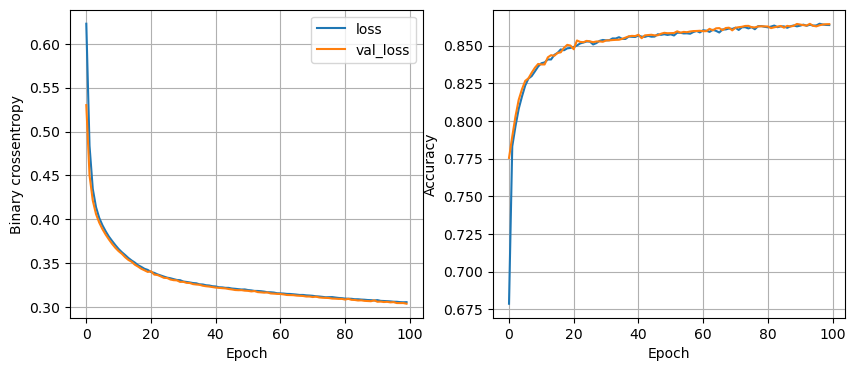

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8488 - loss: 0.3540
32 nodes, dropout 0.2, lr 0.01, batch_size 32


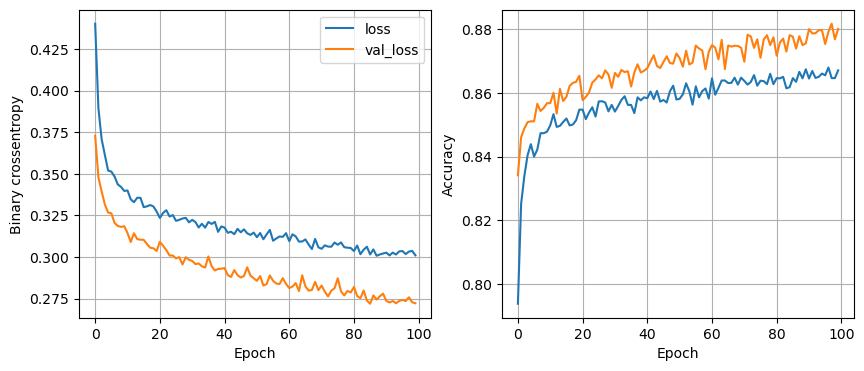

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8735 - loss: 0.3252
32 nodes, dropout 0.2, lr 0.01, batch_size 64


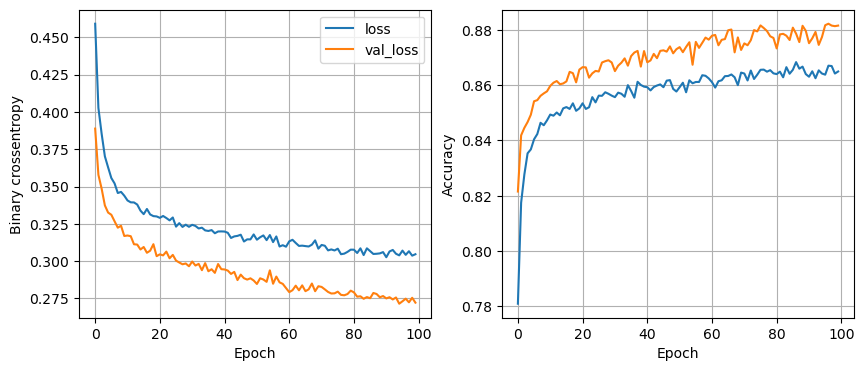

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8690 - loss: 0.3298
32 nodes, dropout 0.2, lr 0.01, batch_size 128


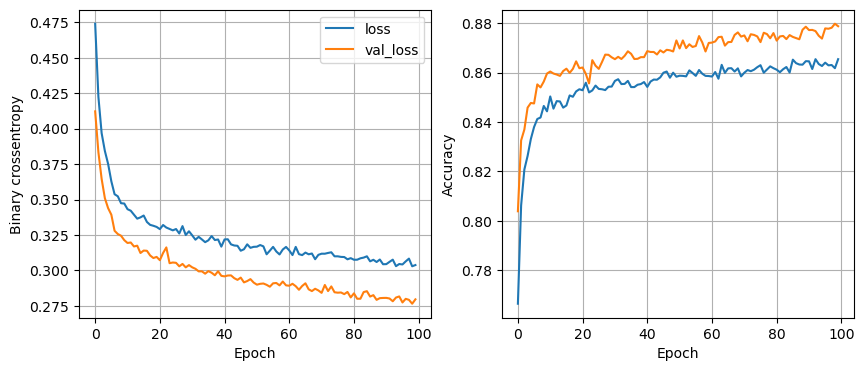

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8601 - loss: 0.3460
32 nodes, dropout 0.2, lr 0.005, batch_size 32


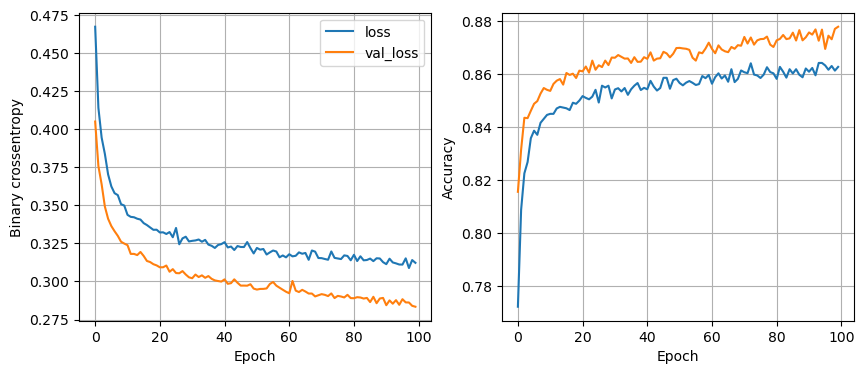

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8578 - loss: 0.3400
32 nodes, dropout 0.2, lr 0.005, batch_size 64


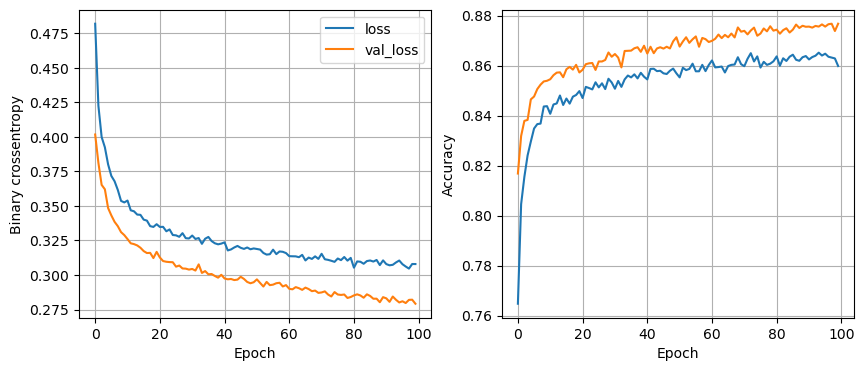

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.8651 - loss: 0.3333
32 nodes, dropout 0.2, lr 0.005, batch_size 128


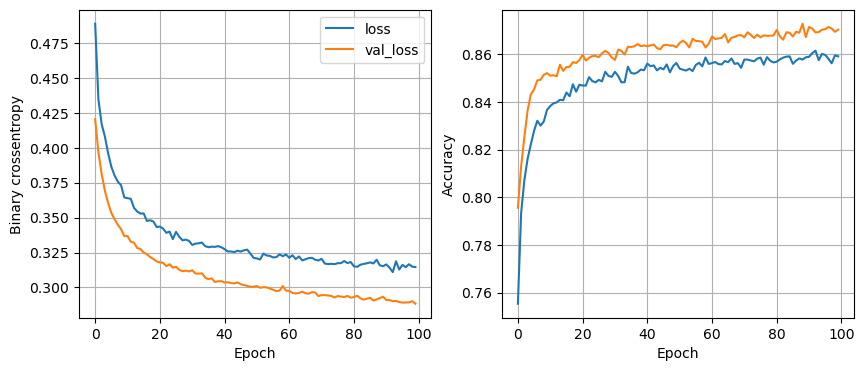

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8544 - loss: 0.3461
32 nodes, dropout 0.2, lr 0.001, batch_size 32


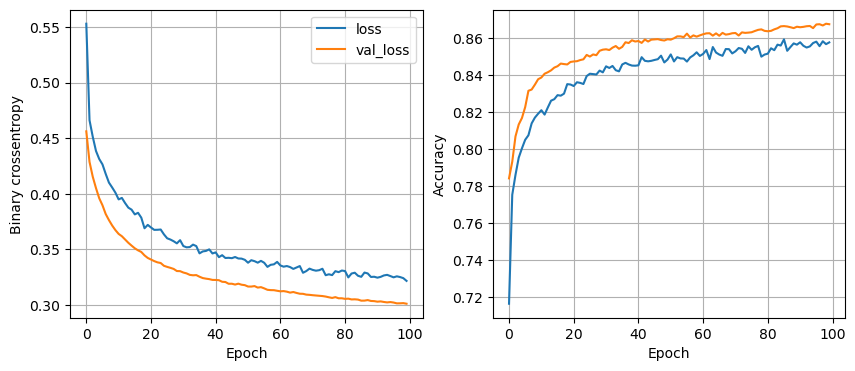

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8499 - loss: 0.3541
32 nodes, dropout 0.2, lr 0.001, batch_size 64


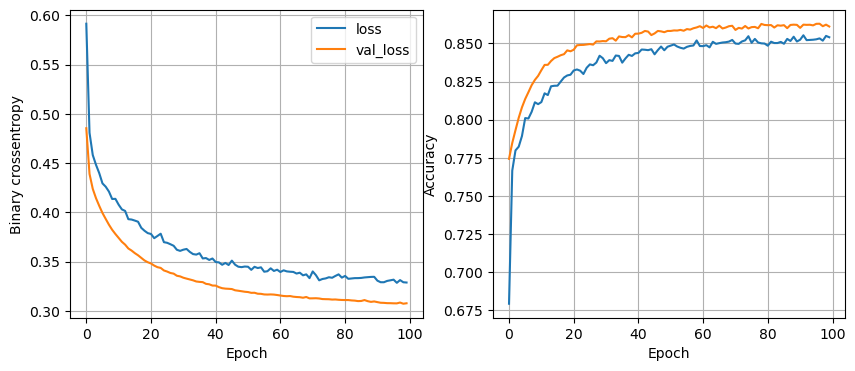

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.8564 - loss: 0.3433
32 nodes, dropout 0.2, lr 0.001, batch_size 128


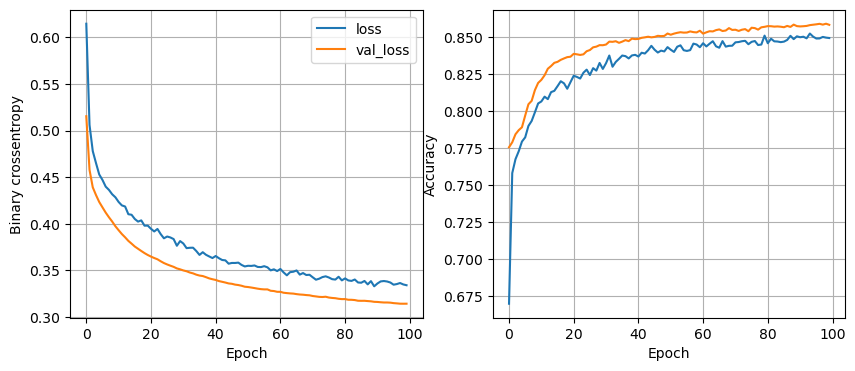

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8545 - loss: 0.3488
64 nodes, dropout 0, lr 0.01, batch_size 32


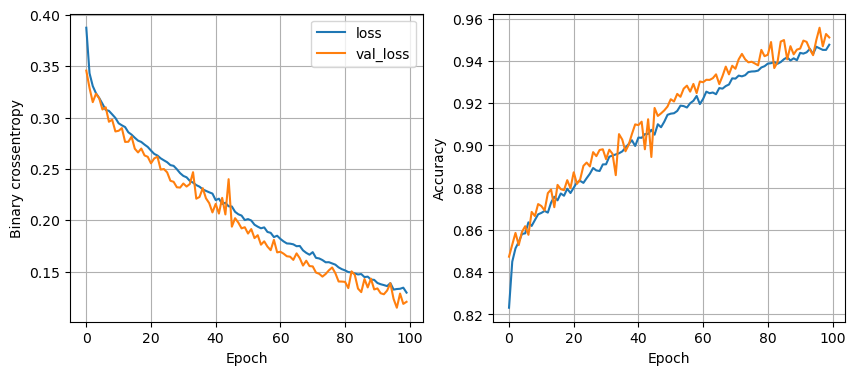

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.8455 - loss: 0.5759
64 nodes, dropout 0, lr 0.01, batch_size 64


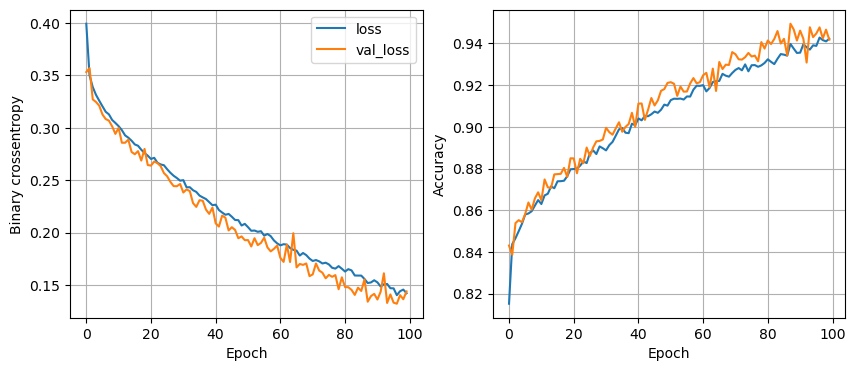

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8436 - loss: 0.5682
64 nodes, dropout 0, lr 0.01, batch_size 128


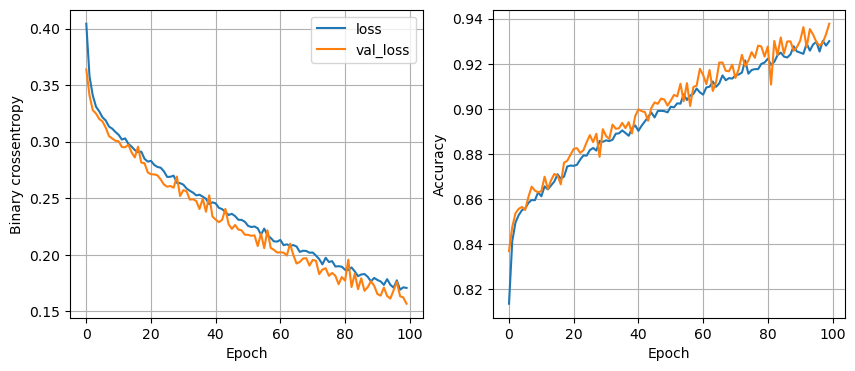

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8506 - loss: 0.4296
64 nodes, dropout 0, lr 0.005, batch_size 32


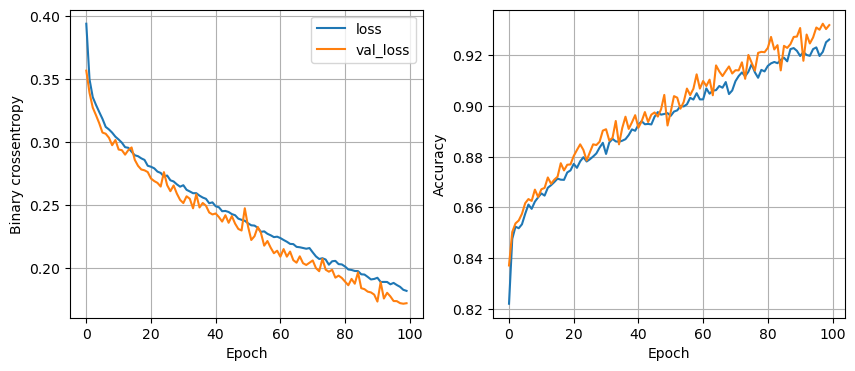

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8330 - loss: 0.4467
64 nodes, dropout 0, lr 0.005, batch_size 64


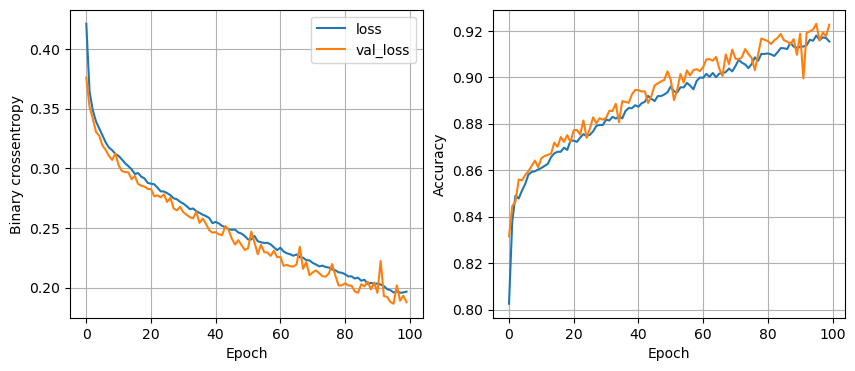

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8502 - loss: 0.4159
64 nodes, dropout 0, lr 0.005, batch_size 128


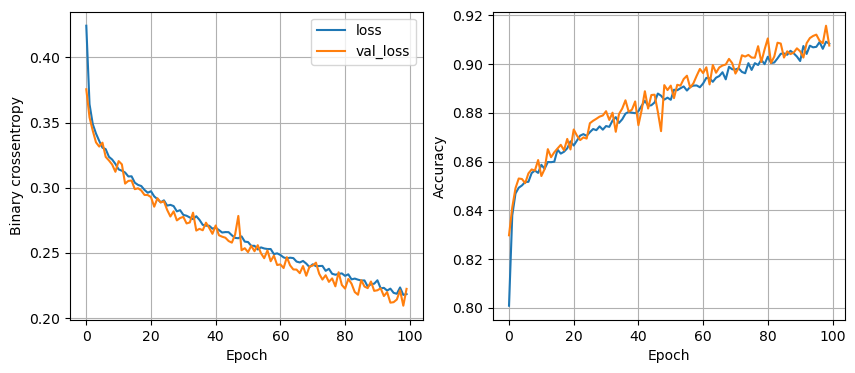

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.8561 - loss: 0.3785
64 nodes, dropout 0, lr 0.001, batch_size 32


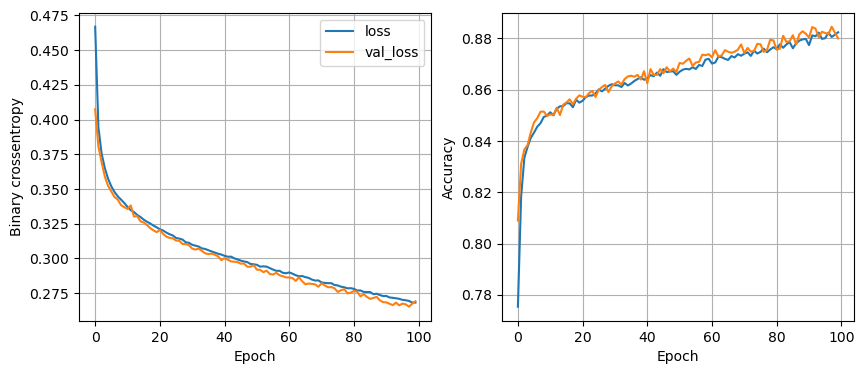

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8648 - loss: 0.3296
64 nodes, dropout 0, lr 0.001, batch_size 64


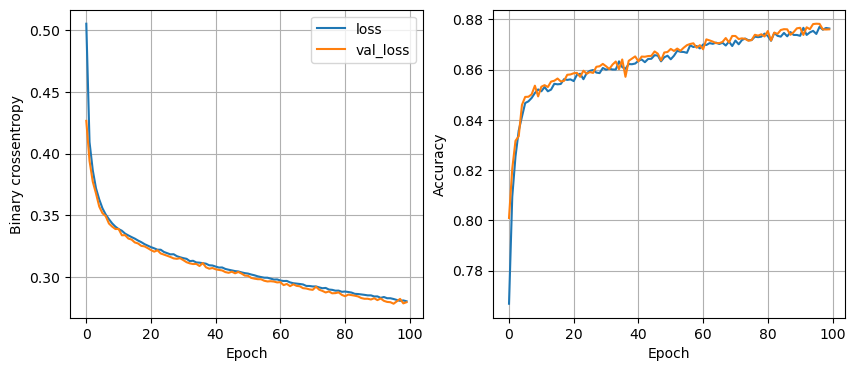

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8555 - loss: 0.3398
64 nodes, dropout 0, lr 0.001, batch_size 128


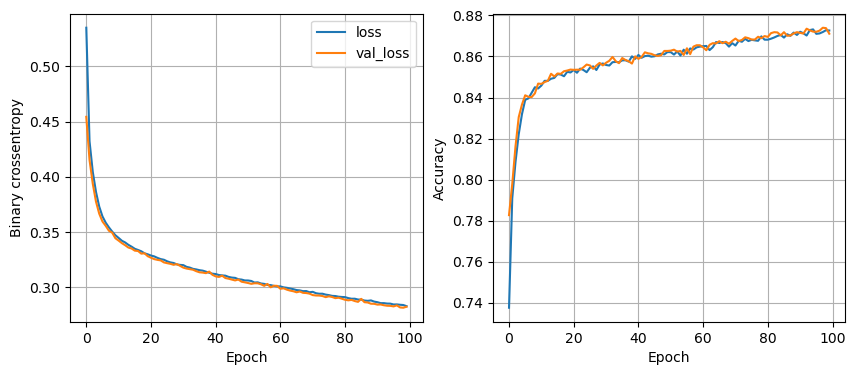

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8637 - loss: 0.3330
64 nodes, dropout 0.2, lr 0.01, batch_size 32


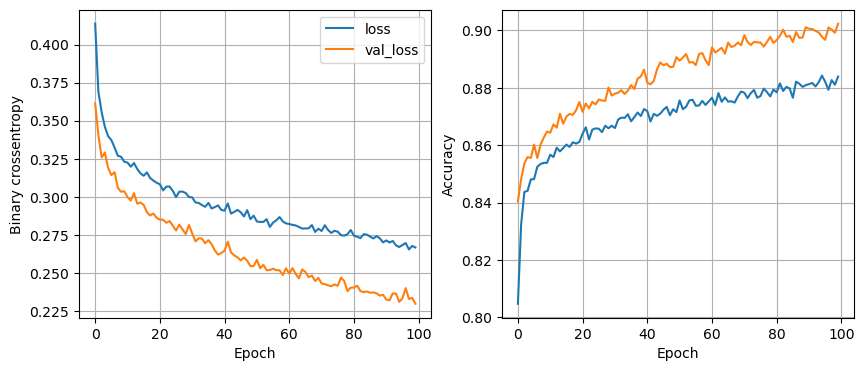

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.8669 - loss: 0.3333
64 nodes, dropout 0.2, lr 0.01, batch_size 64


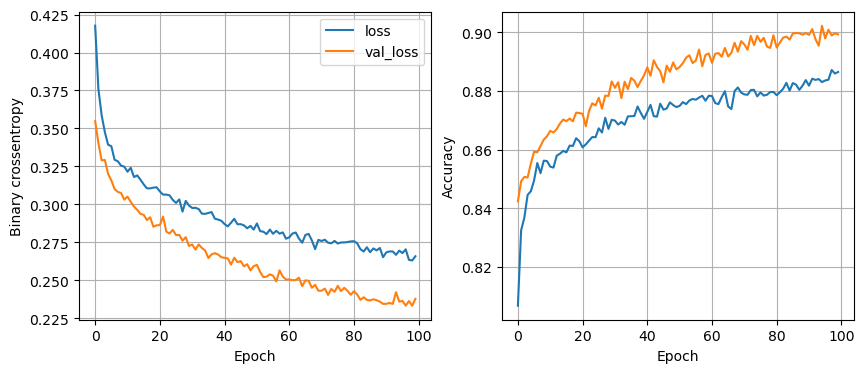

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8712 - loss: 0.3245
64 nodes, dropout 0.2, lr 0.01, batch_size 128


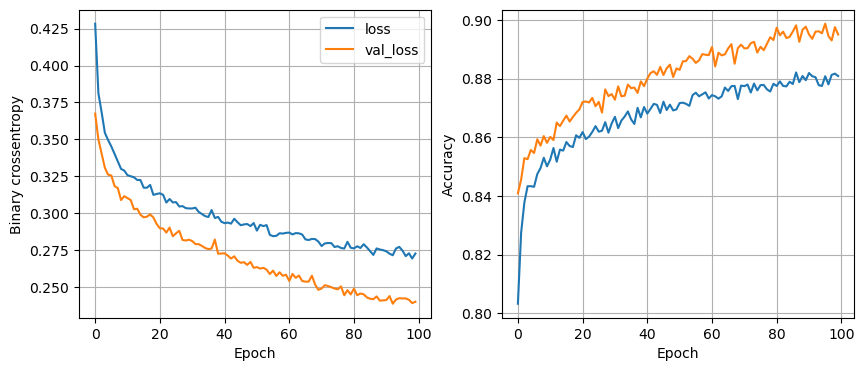

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8626 - loss: 0.3269
64 nodes, dropout 0.2, lr 0.005, batch_size 32


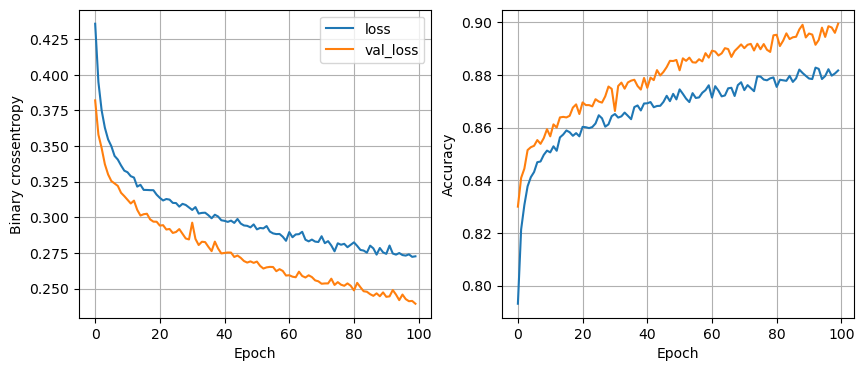

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8630 - loss: 0.3279
64 nodes, dropout 0.2, lr 0.005, batch_size 64


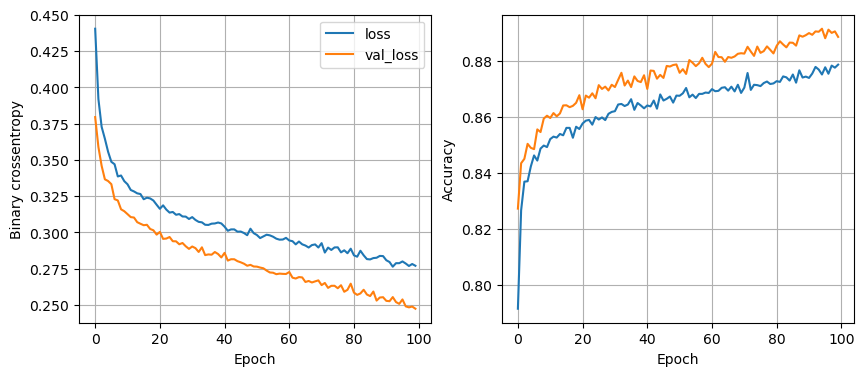

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8598 - loss: 0.3390
64 nodes, dropout 0.2, lr 0.005, batch_size 128


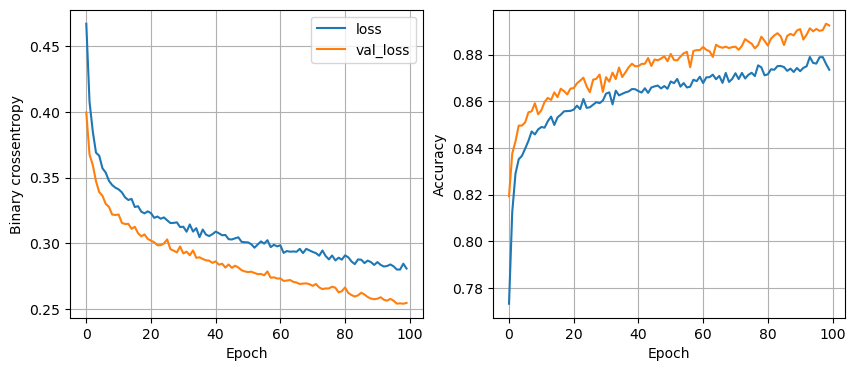

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8592 - loss: 0.3464
64 nodes, dropout 0.2, lr 0.001, batch_size 32


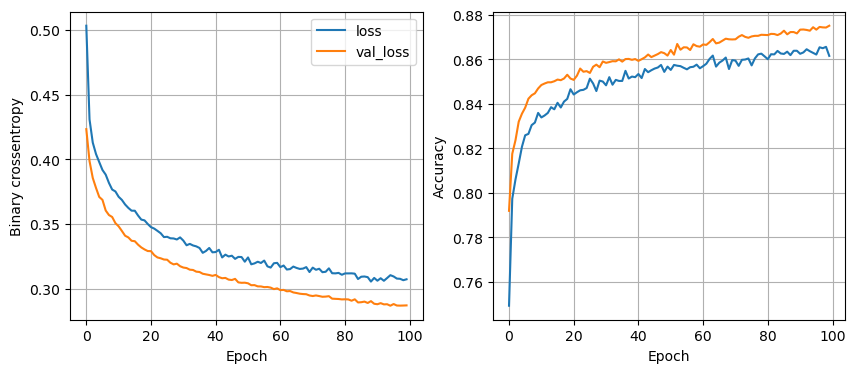

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.8572 - loss: 0.3446
64 nodes, dropout 0.2, lr 0.001, batch_size 64


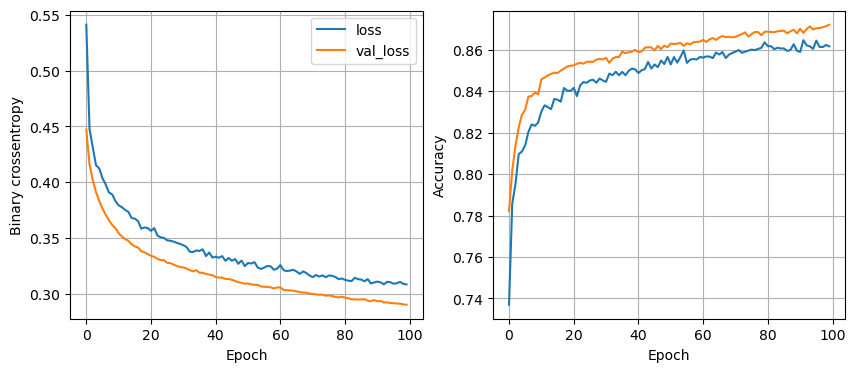

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8573 - loss: 0.3431
64 nodes, dropout 0.2, lr 0.001, batch_size 128


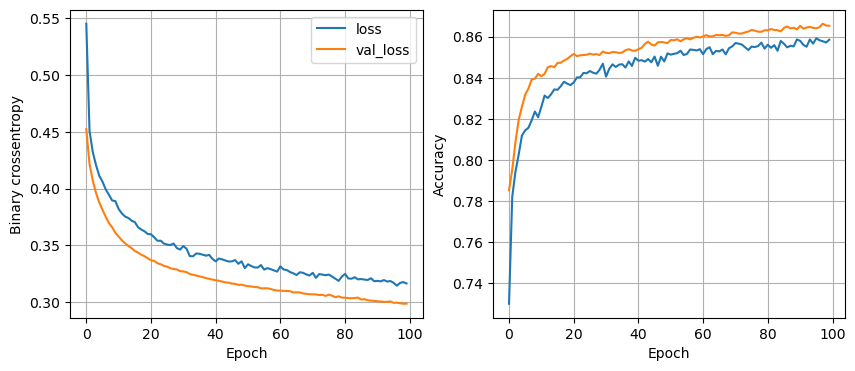

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.8592 - loss: 0.3401


In [24]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
	for dropout_prob in [0, 0.2]:
		for lr in [0.01, 0.005, 0.001]:
			for batch_size in [32, 64, 128]:
				print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}')
				model, history = train_model(x_train=x_train, y_train=y_train, num_nodes=num_nodes, dropout_prob=dropout_prob, lr=lr, batch_size=batch_size, epochs=epochs, x_valid=x_valid, y_valid=y_valid)
				plot_history(history=history)
				val_loss = model.evaluate(x_valid, y_valid)[0]
				if val_loss < least_val_loss:
					least_val_loss = val_loss
					least_loss_model = model

In [28]:
least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1346
           1       0.88      0.90      0.89      2458

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

